In [ ]:
#blender preparation in colab
#runtime should have GPU selected
import os

os.environ["LD_PRELOAD"] = ""

!apt update
!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

#libtcmalloc appeared in the colab VM
!apt install libboost-all-dev
!apt install libgl1-mesa-dev
!apt install libglu1-mesa libsm-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [41.5 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hi

In [ ]:
gpu_enabled = True #@param {type:"boolean"}
cpu_enabled = True #@param {type:"boolean"}
# Enable GPU rendering (or add custom properties here)
data = "import re\n"+\
    "import bpy\n"+\
    "scene = bpy.context.scene\n"+\
    "scene.cycles.device = 'GPU'\n"+\
    "prefs = bpy.context.preferences\n"+\
    "prefs.addons['cycles'].preferences.get_devices()\n"+\
    "cprefs = prefs.addons['cycles'].preferences\n"+\
    "print(cprefs)\n"+\
    "for compute_device_type in ('CUDA', 'OPENCL', 'NONE'):\n"+\
    "    try:\n"+\
    "        cprefs.compute_device_type = compute_device_type\n"+\
    "        print('Device found:',compute_device_type)\n"+\
    "        break\n"+\
    "    except TypeError:\n"+\
    "        pass\n"+\
    "for device in cprefs.devices:\n"+\
    "    if not re.match('intel', device.name, re.I):\n"+\
    "        print('Activating',device)\n"+\
    "        device.use = "+str(gpu_enabled)+"\n"+\
    "    else:\n"+\
    "        device.use = "+str(cpu_enabled)+"\n"
with open('setgpu.py', 'w') as f:
    f.write(data)

#Downloading latest BLENDER and UNCOMPRESSING and CPU CHECK
!wget https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.91/blender-2.91.0-linux64.tar.xz
!tar -xf blender-2.91.0-linux64.tar.xz
!ln -s /content/blender-2.91.0-linux64/blender /usr/local/bin/blender
!blender -b -P setgpu.py 

#"""
#    Blender 2.91.0 (hash 0f45cab862b8 built 2020-11-25 08:51:08)
#ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
#ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
#ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
#ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
#ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
#ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
#ALSA lib conf.c:5007:(snd_config_expand) Evaluate error: No such file or directory
#ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM default
#found bundled python: /content/blender-2.91.0-linux64/2.91/python
#<bpy_struct, CyclesPreferences at 0x7f3461b32368>

#Device found: CUDA     # (FOR GPU SHOULD BE CUDA)

#Activating <bpy_struct, CyclesDeviceSettings("Tesla T4") at 0x7f3461c42588>
#
#Blender quit"""

--2020-12-25 05:42:28--  https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.91/blender-2.91.0-linux64.tar.xz
Resolving ftp.nluug.nl (ftp.nluug.nl)... 145.220.21.40, 2001:67c:6ec:221:145:220:21:40
Connecting to ftp.nluug.nl (ftp.nluug.nl)|145.220.21.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151566984 (145M) [application/x-tar]
Saving to: ‘blender-2.91.0-linux64.tar.xz’

blender-2.91.0-linu 100%[===================>] 144.54M  31.5MB/s    in 11s     

2020-12-25 05:42:39 (12.9 MB/s) - ‘blender-2.91.0-linux64.tar.xz’ saved [151566984/151566984]

Blender 2.91.0 (hash 0f45cab862b8 built 2020-11-25 08:51:08)
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_concat returned error: No such file or direct

In [ ]:
from IPython.display import clear_output

for i in range(10):
    
    print("Hello World!")

Hello World!


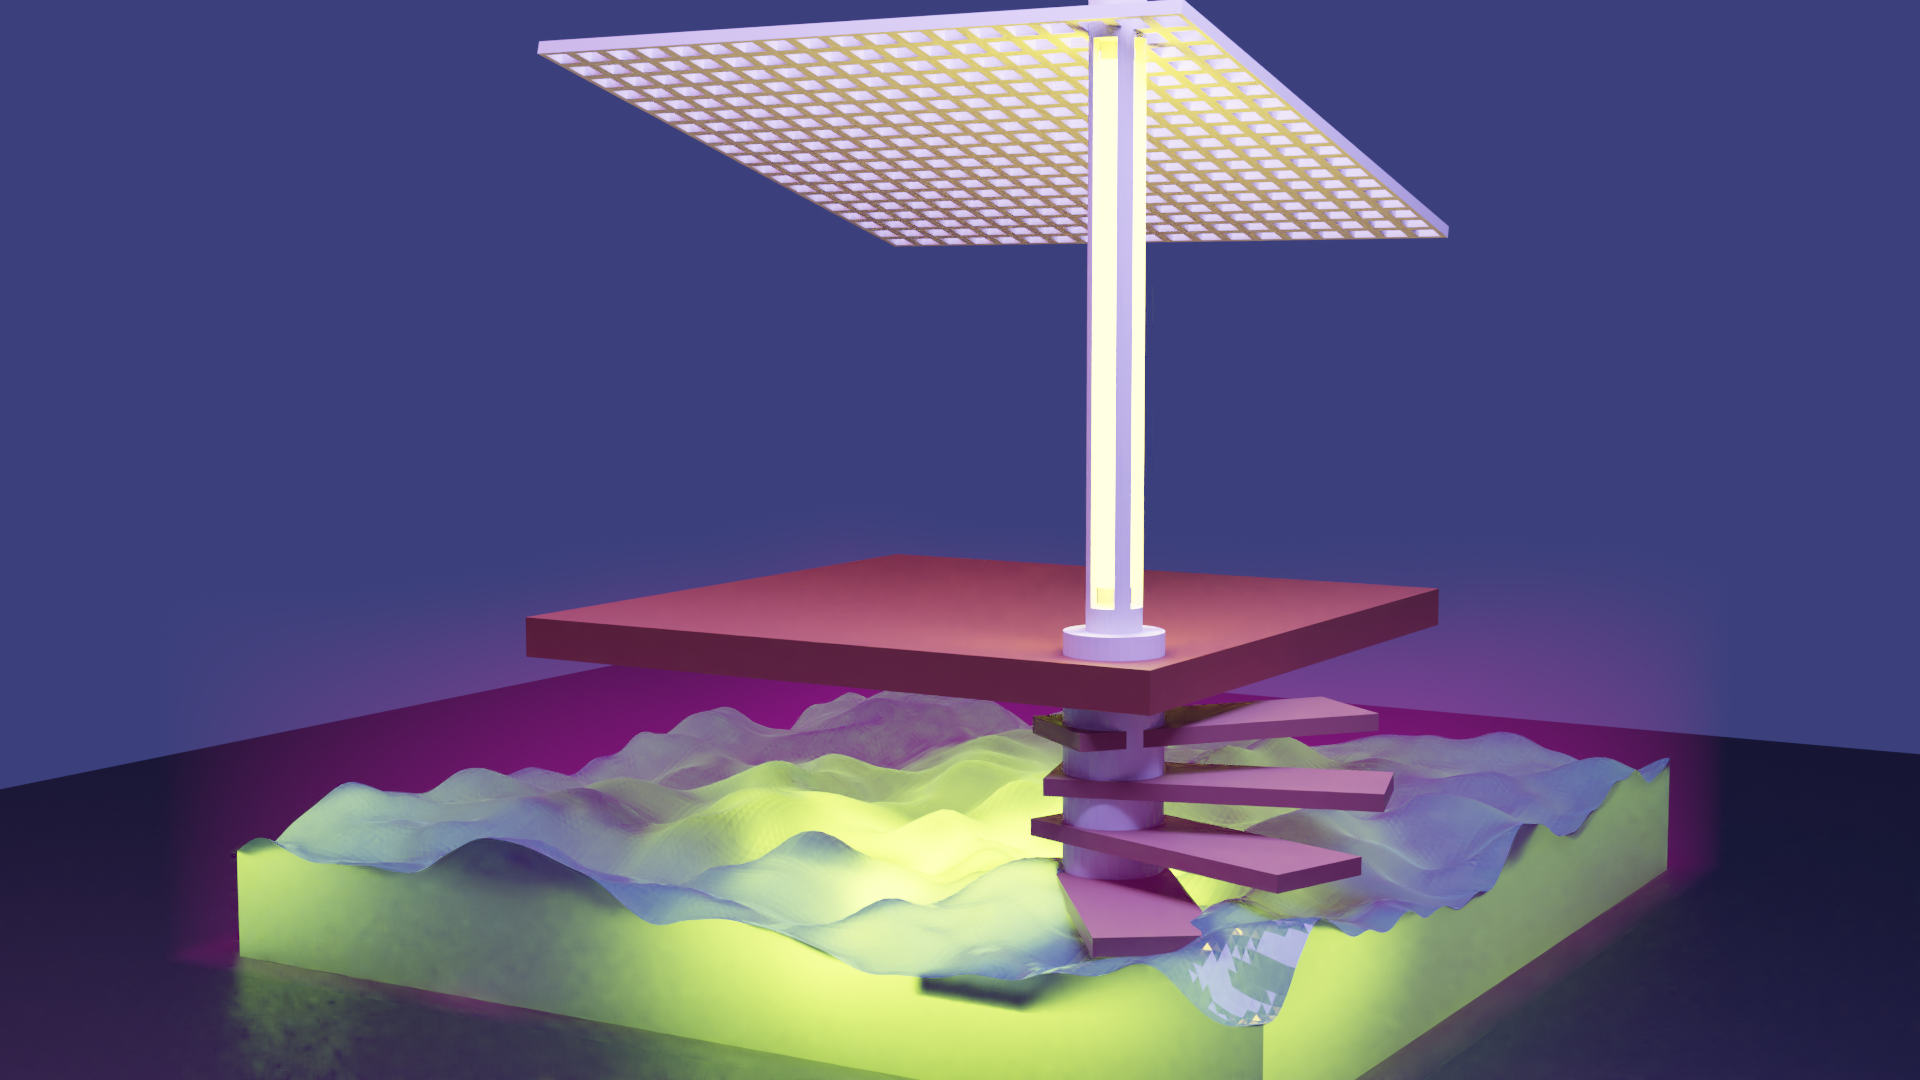

In [ ]:
#@title Blender Parameters
#in .BLEND file should have GPU slected in CYCLES 
#.blend should in droped in files folder
filename = 'water' #@param {type: "string"}
filename+= '.blend'
renderer = "CYCLES" #@param ["CYCLES"]
frame =   0#@param {type: "number"}

from IPython.display import clear_output
!blender -b -P setgpu.py $filename -noaudio -o ./test_ -E $renderer -x 1 -f $frame 
clear_output(wait=True)
from IPython.display import Image
Image('test_0000.png')